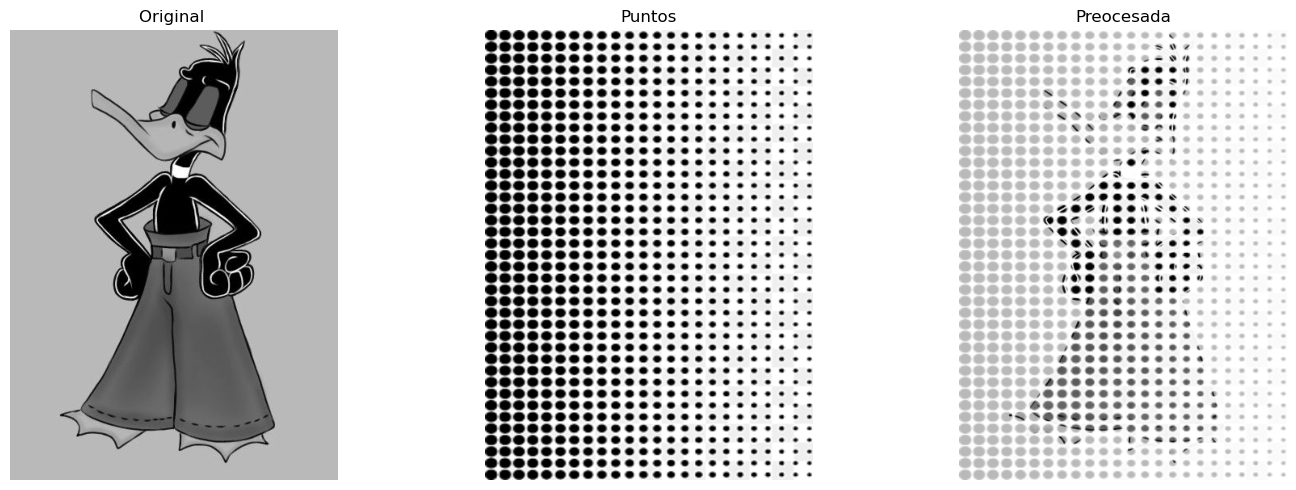

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

pato = cv2.imread('pato.jpg')
puntos = cv2.imread('puntos.png', cv2.IMREAD_GRAYSCALE)  

pato_gris = cv2.cvtColor(pato, cv2.COLOR_BGR2GRAY)

puntos = cv2.resize(puntos, (pato_gris.shape[1], pato_gris.shape[0]))

alpha = 255 - puntos
alpha_norm = alpha.astype(np.float32) / 255.0

resultado = (pato_gris * alpha_norm + 255 * (1 - alpha_norm)).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(pato_gris, cmap='gray')
plt.title("Original ")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(puntos, cmap='gray')
plt.title("Puntos")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(resultado, cmap='gray')
plt.title("Preocesada")
plt.axis('off')

plt.tight_layout()
plt.show()


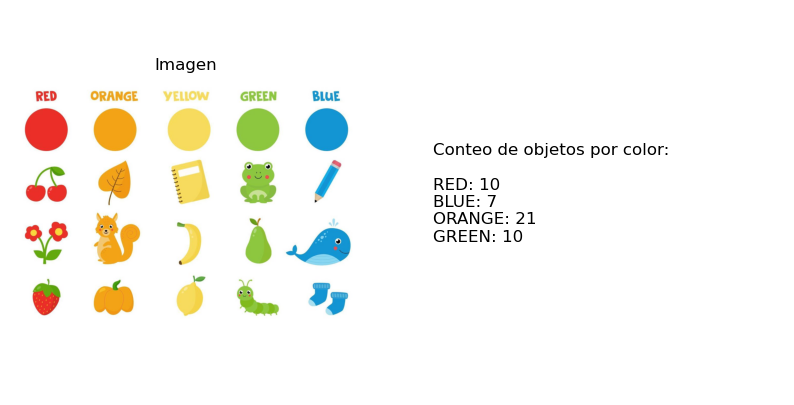

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def contar_objetos_por_color(imagen):
    img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (7, 7), 0)
    _, binarizada = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    etiquetas = measure.label(binarizada, connectivity=2)
    regiones = measure.regionprops(etiquetas)
    
    conteo = {}

    for region in regiones:
        minr, minc, maxr, maxc = region.bbox
        objeto = hsv[minr:maxr, minc:maxc]
        if objeto.size == 0:
            continue
        hue = objeto[:, :, 0].flatten()
        dominant = np.argmax(np.histogram(hue, bins=180, range=(0, 180))[0])

        if (0 <= dominant < 10) or (dominant >= 160): color = 'RED'
        elif 10 <= dominant < 25: color = 'ORANGE'
        elif 25 <= dominant < 35: color = 'YELLOW'
        elif 35 <= dominant < 85: color = 'GREEN'
        elif 85 <= dominant < 130: color = 'BLUE'
        else: color = 'OTHER'

        if color in conteo:
            conteo[color] += 1
        else:
            conteo[color] = 1

    return conteo, img_rgb

imagen = cv2.imread("colores.jpg")

conteo, img = contar_objetos_por_color(imagen)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Imagen")

plt.subplot(1, 2, 2)
plt.axis('off')
text = "Conteo de objetos por color:\n\n"
for color, cantidad in conteo.items():
    text += f"{color}: {cantidad}\n"
plt.text(0, 0.5, text, fontsize=12, va='center')

plt.show()

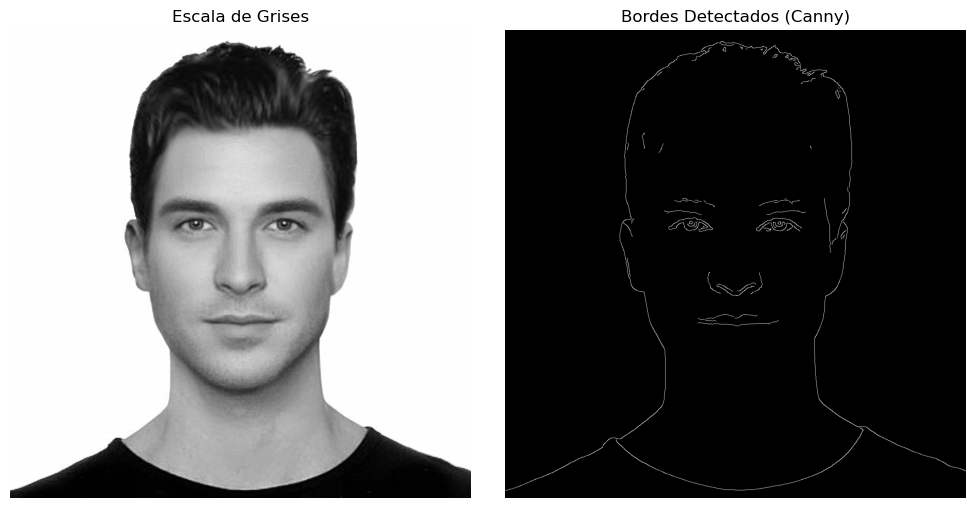

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('rostro.jpg')  
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

gauss = cv2.GaussianBlur(gris, (5, 5), 1.4)

bordes = cv2.Canny(gauss, threshold1=100, threshold2=50)

plt.figure(figsize=(15, 5))



plt.subplot(1, 3, 2)
plt.imshow(gris, cmap='gray')
plt.title("Escala de Grises")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bordes, cmap='gray')
plt.title("Bordes Detectados (Canny)")
plt.axis('off')

plt.tight_layout()
plt.show()
